<a href="https://colab.research.google.com/github/suucong/AI_Practice/blob/main/autoincoder_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [9]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10  # 총 epoch 수를 10으로 수정

In [10]:
# 데이터 다운로드
mnist_train = dset.MNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST(root="../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [11]:
# DataLoader 설정
train_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [17]:
# 모델 선언
class Autoencoder(nn.Module):
    def __init__(self, hidden_size=128):  # hidden layer 노드 수를 128로 변경
        super(Autoencoder, self).__init__()
        self.hidden_size = hidden_size  # hidden_size 변수 추가
        self.encoder = nn.Linear(28*28, self.hidden_size)
        self.decoder = nn.Linear(self.hidden_size, 28*28)

    def forward(self, x):
        x = x.view(batch_size, -1).to(device)  # GPU로 이동
        encoded = self.encoder(x)
        # 이미지를 GPU로 올리기 전에 노이즈 추가
        noise = init.normal_(torch.FloatTensor(batch_size, self.hidden_size).to(device), 0, 0.1)  # GPU로 이동
        encoded = encoded + noise
        out = self.decoder(encoded).view(batch_size, 1, 28, 28)
        return out

In [18]:
# 손실 함수, 최적화 함수
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Autoencoder().to(device)
loss_func = nn.MSELoss()  # 인스턴스를 생성
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


In [19]:
loss_arr = []
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        # noise 추가
        noise = init.normal_(torch.FloatTensor(batch_size, 1, 28, 28), 0, 0.1)
        image = image + noise
        image = image.to(device)  # GPU로 이동

        optimizer.zero_grad()
        output = model.forward(image)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

    if j % 1000 == 0:
        print(loss)
        loss_arr.append(loss.cpu().data.numpy()[0])

In [23]:
# 훈련
loss_arr = []
for epoch in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        optimizer.zero_grad()
        output = model.forward(image)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(f"Epoch [{epoch}/{num_epoch}], Step [{j}/{len(train_loader)}], Loss: {loss.item()}")
            loss_arr.append(loss.cpu().data.numpy())

Epoch [0/10], Step [0/39], Loss: 0.032283272594213486
Epoch [1/10], Step [0/39], Loss: 0.03064568154513836
Epoch [2/10], Step [0/39], Loss: 0.029400523751974106
Epoch [3/10], Step [0/39], Loss: 0.02803639881312847
Epoch [4/10], Step [0/39], Loss: 0.027033807709813118
Epoch [5/10], Step [0/39], Loss: 0.026145637035369873
Epoch [6/10], Step [0/39], Loss: 0.025308389216661453
Epoch [7/10], Step [0/39], Loss: 0.024375811219215393
Epoch [8/10], Step [0/39], Loss: 0.023826515302062035
Epoch [9/10], Step [0/39], Loss: 0.023326430469751358


torch.Size([256, 28, 28])


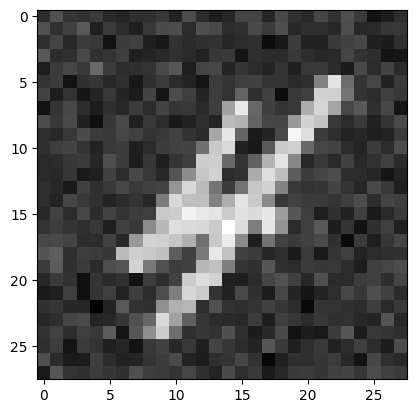

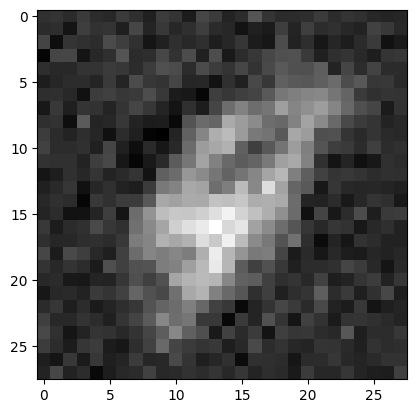

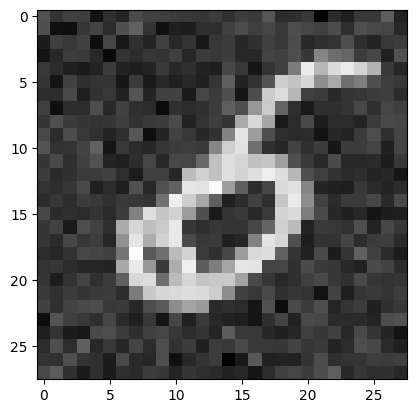

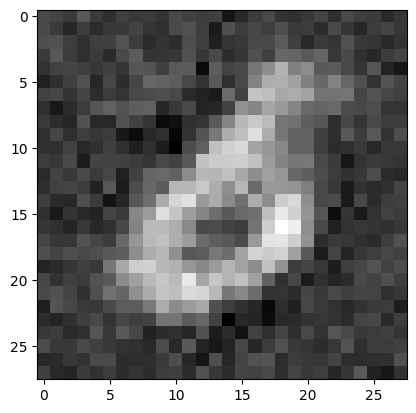

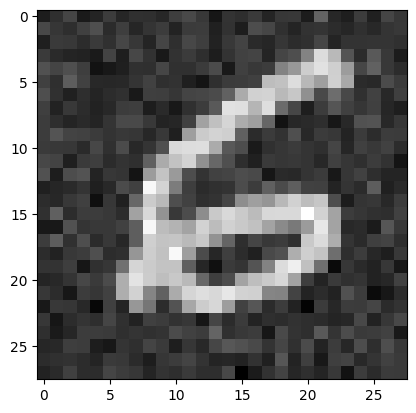

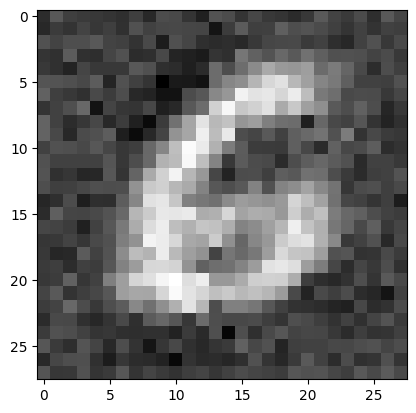

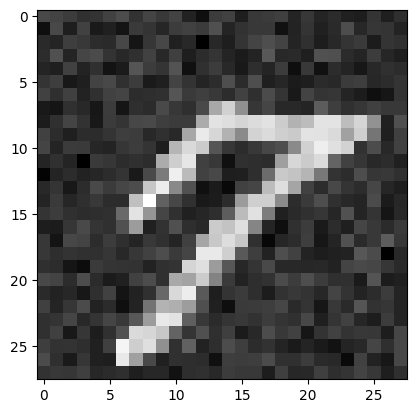

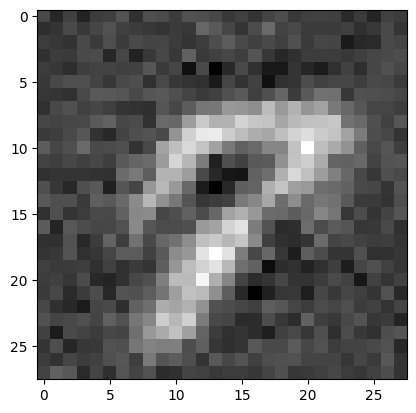

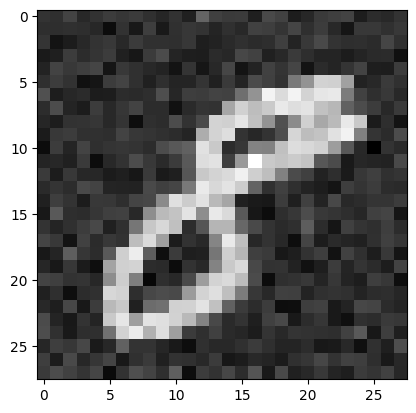

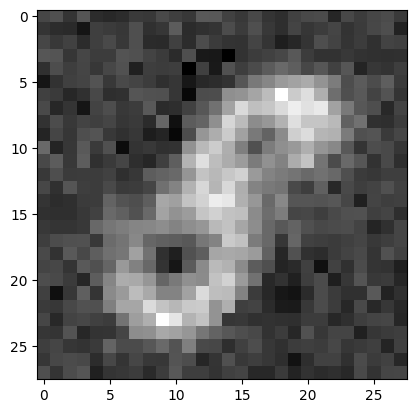

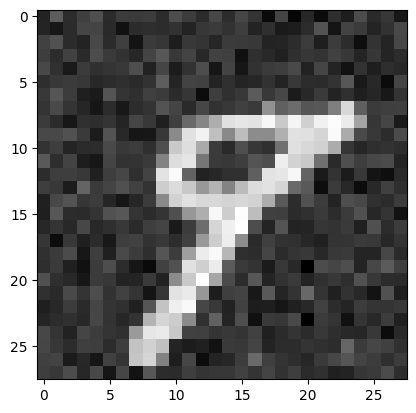

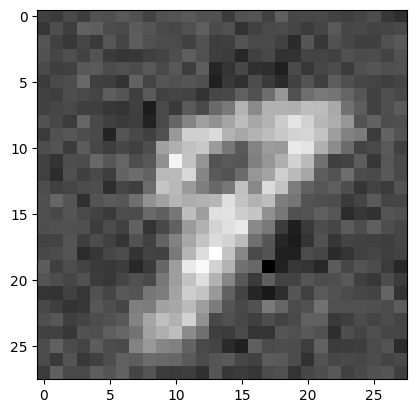

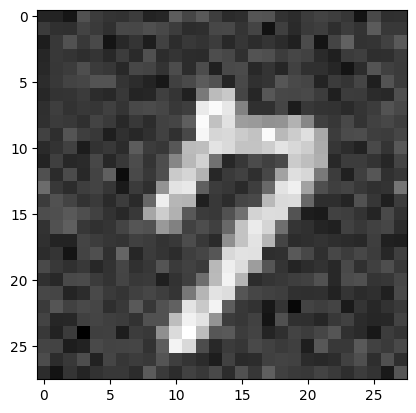

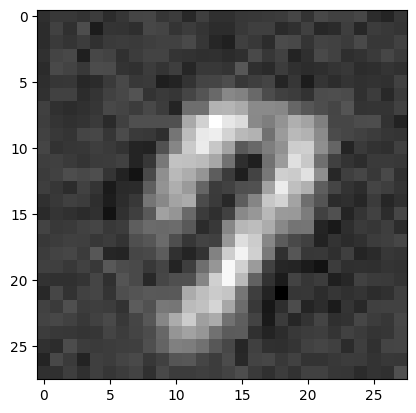

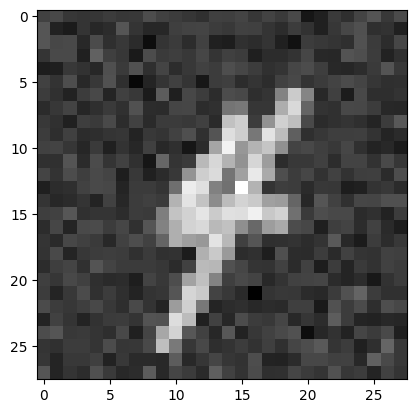

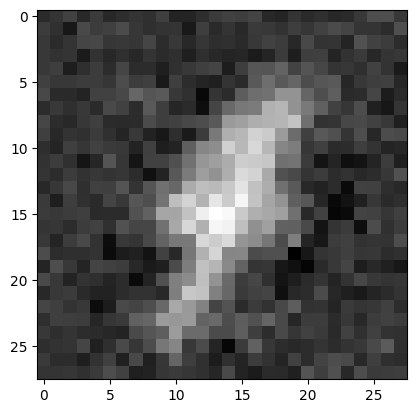

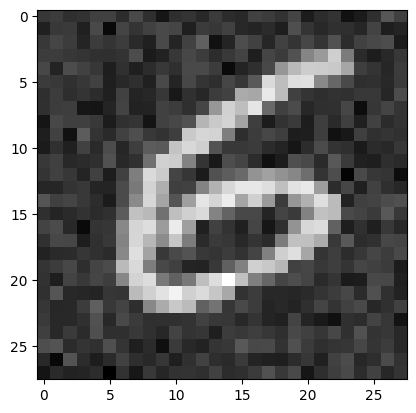

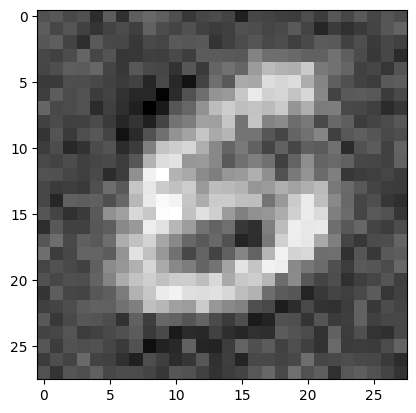

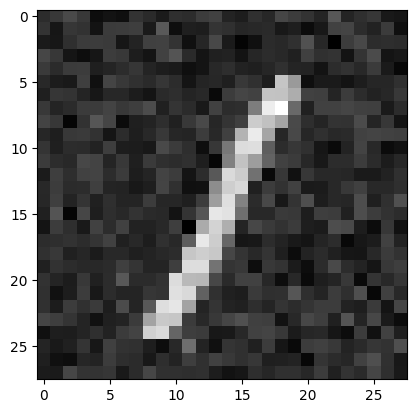

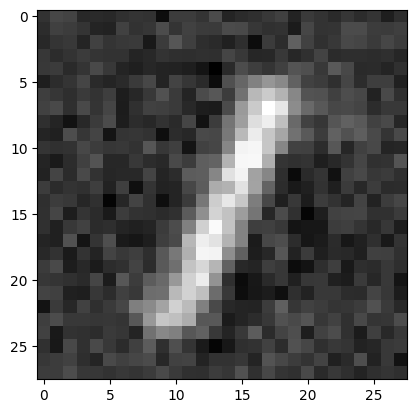

In [21]:
# 결과 시각화
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).cpu().numpy(), cmap='gray')  # 수정된 부분
    plt.show()
    plt.imshow(out_img[i].cpu().numpy(), cmap='gray')  # 수정된 부분
    plt.show()